In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
# import seaborn as sns
from pathlib import Path
from data_handling import load_results_table, load_ensemble_weights_table
from plot import paperplot_lambdas_vs_accuracy_barplot, paperplot2_lambdas_vs_accuracy_vs_ensemble_weights_bars

## Presenting results of Experiments

This notebooks shows a good practice for presenting results of DL experiments. It has been proven very useful for my first two DL projects.
1. Save your results somewhere on your disc in any useful format, e.g. numpy arrays or dictionaries stored as .npz files or human readable format like .csv files.
2. Load your results into a pandas dataframe such that you can have a look at the data in your notebook (as we do it here).
3. Create fancy plots of the data in the tables.
In this way you can easily separate file loading and data preprocessing code from your plotting code. 

Just have a look how it is done here:

In [2]:
base_dir = './data/MOONS/'
da_method = 'dann'
res_dir = Path(base_dir) / da_method
# write such functions that do all file loading and preprocessing
src_tgt_acc_df = load_results_table(base_dir=res_dir) 
ew_df = load_ensemble_weights_table(base_dir=res_dir)

In [3]:
src_tgt_acc_df # this is how the raw data look like
# In this case: rows show the accuracy (accessible through a pd.MultiIndex)
# and columns show different runs / experiments / methods

0     1e-06     1e-05    0.0001  \
domains             seed domain                                           
moons_src-moons_tgt 1    source  0.971429  0.965714  0.948571  0.994286   
                         target  0.862857  0.845714  0.851429  0.817143   
                    2    source  0.920000  0.925714  0.942857  0.920000   
                         target  0.794286  0.782857  0.800000  0.788571   
                    3    source  0.948571  0.982857  0.925714  0.937143   
                         target  0.800000  0.851429  0.788571  0.800000   
                    4    source  0.954286  0.942857  0.942857  0.948571   
                         target  0.788571  0.794286  0.800000  0.840000   
                    5    source  0.965714  0.937143  0.965714  0.954286   
                         target  0.805714  0.805714  0.851429  0.800000   

                                    0.001      0.01       0.1         1  \
domains             seed domain                                           
moons_src-moons_tgt 1    source  0.925714  0.954286  0.937143  0.925714   
                         target  0.800000  0.845714  0.800000  0.782857   
                    2    source  0.914286  0.920000  0.954286  0.937143   
                         target  0.777143  0.851429  0.851429  0.800000   
                    3    source  0.971429  0.954286  0.937143  0.937143   
                         target  0.851429  0.811429  0.782857  0.800000   
                    4    source  0.965714  0.925714  0.954286  0.942857   
                         target  0.880000  0.782857  0.834286  0.782857   
                    5    source  0.977143  0.982857  0.965714  0.965714   
                         target  0.800000  0.902857  0.840000  0.845714   

                                        2         5        10        15  \
domains             seed domain                                           
moons_src-moons_tgt 1    source  0.937143  0.908571  0.902857  0.874286   
                         target  0.782857  0.788571  0.777143  0.840000   
                    2    source  0.920000  0.937143  0.948571  0.885714   
                         target  0.777143  0.794286  0.800000  0.811429   
                    3    source  0.942857  0.914286  0.914286  0.908571   
                         target  0.805714  0.800000  0.794286  0.788571   
                    4    source  0.891429  0.908571  0.920000  0.891429   
                         target  0.811429  0.811429  0.777143  0.811429   
                    5    source  0.937143  0.908571  0.908571  0.885714   
                         target  0.794286  0.794286  0.788571  0.822857   

                                      agg  source_reg  target_majority_reg  \
domains             seed domain                                              
moons_src-moons_tgt 1    source  1.000000    1.000000             0.942857   
                         target  0.920000    0.857143             0.805714   
                    2    source  0.977143    0.994286             0.937143   
                         target  0.931429    0.891429             0.800000   
                    3    source  1.000000    0.994286             0.965714   
                         target  0.885714    0.845714             0.811429   
                    4    source  0.982857    0.994286             0.954286   
                         target  0.902857    0.851429             0.822857   
                    5    source  1.000000    1.000000             0.954286   
                         target  0.925714    0.908571             0.805714   

                                 target_confidence_reg       dev       iwv  \
domains             seed domain                                              
moons_src-moons_tgt 1    source               0.965714  0.994286  0.994286   
                         target               0.811429  0.817143  0.817143   
                    2    source               0.937143  0.937143  0.937143   
          

In [4]:
# you can now use pandas to display the raw data in a better way, 
# e.g. show the mean accuracy and display better methods with darker background
display_df = src_tgt_acc_df.groupby('domain').mean()
display(display_df.style.background_gradient('Greens',axis=1))

,0,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,2,5,10,15,agg,source_reg,target_majority_reg,target_confidence_reg,dev,iwv,target_majority_vote
domain,,,,,,,,,,,,,,,,,,,
source,0.952000,0.950857,0.945143,0.950857,0.950857,0.947429,0.949714,0.941714,0.925714,0.915429,0.918857,0.889143,0.992000,0.996571,0.950857,0.955429,0.971429,0.971429,0.940571
target,0.810286,0.816000,0.818286,0.809143,0.821714,0.838857,0.821714,0.802286,0.794286,0.797714,0.787429,0.814857,0.913143,0.870857,0.809143,0.809143,0.829714,0.829714,0.808000


In [5]:
ew_df # these are some internal numbers related to the experiments

0     1e-06     1e-05  \
seed domains             ensemble_methods                                      
4    moons_src-moons_tgt agg                    0.856134  0.669291  0.477588   
                         source_reg             2.242454 -0.310522 -2.093086   
                         target_majority_reg   -0.958126 -1.680360  4.503201   
                         target_confidence_reg -0.241106 -1.712864  3.262410   
                         dev                    0.000000  0.000000  0.000000   
                         iwv                    0.000000  0.000000  0.000000   
                         target_majority_vote   0.000000  0.000000  0.000000   
1    moons_src-moons_tgt agg                    0.552725  0.290036 -0.385185   
                         source_reg             1.286446 -1.249065  0.781497   
                         target_majority_reg   -1.726938  1.951876  1.419564   
                         target_confidence_reg -1.697393  1.900558  0.594971   
                         dev                    0.000000  0.000000  0.000000   
                         iwv                    0.000000  0.000000  0.000000   
                         target_majority_vote   0.000000  0.000000  0.000000   
5    moons_src-moons_tgt agg                    0.734368 -0.832694  0.350729   
                         source_reg            -2.002255 -0.437025  1.179638   
                         target_majority_reg    6.842013 -0.036191 -1.728037   
                         target_confidence_reg  6.490455  0.255838 -2.038324   
                         dev                    0.000000  0.000000  0.000000   
                         iwv                    0.000000  0.000000  0.000000   
                         target_majority_vote   0.000000  0.000000  0.000000   
3    moons_src-moons_tgt agg                    0.016527  1.444133 -0.193378   
                         source_reg             0.723366  2.887570 -0.183469   
                         target_majority_reg   -0.923045  1.097207  0.087996   
                         target_confidence_reg -0.923045  1.097207  0.087996   
                         dev                    0.000000  1.000000  0.000000   
                         iwv                    0.000000  1.000000  0.000000   
                         target_majority_vote   0.000000  0.000000  0.000000   
2    moons_src-moons_tgt agg                   -0.985824  0.775492 -0.073563   
                         source_reg            -4.714320  2.163706 -0.912076   
                         target_majority_reg    1.610180 -0.956933  3.690073   
                         target_confidence_reg  1.914797  0.182735  3.007720   
                         dev                    0.000000  0.000000  0.000000   
                         iwv                    0.000000  0.000000  0.000000   
                         target_majority_vote   0.000000  0.000000  0.000000   

                                                  0.0001     0.001      0.01  \
seed domains             ensemble_methods                                      
4    moons_src-moons_tgt agg                   -0.316096  1.677904 -0.302427   
                         source_reg            -2.303369 -0.935334  0.878257   
                         target_majority_reg   -2.583426 -0.167789  1.124171   
                         target_confidence_reg -2.283963 -0.093192  1.953403   
                         dev                    0.000000  1.000000  0.000000   
                         iwv                    0.000000  1.000000  0.000000   
                         target_majority_vote   0.000000  0.000000  0.000000   
1    moons_src-moons_tgt agg                    2.772174 -0.337393  0.248039   
                         source_reg             1.418536  0.574914 -0.963376   
                         target_majority_reg    0.204861 -0.913925 -0.933174   
                         target_confidence_reg  0.293531 -1.053005  0.265973   
                         dev                    1.0000

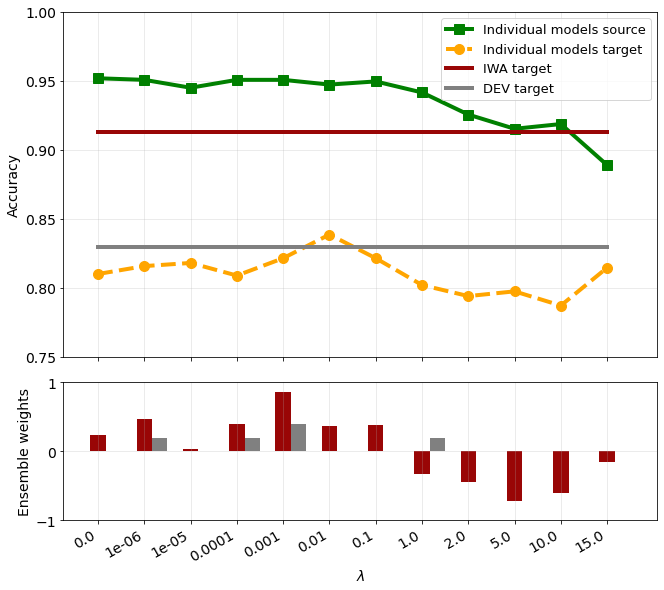

In [6]:
# Now we can plot the data in our tables:

mpl.rc('font', size=14) # select fontsize in plots
# mpl.rcdefaults()

# seed='4'
# src_tgt_acc_df = src_tgt_acc_df.xs(seed, level='seed', drop_level=False)
# ew_df = ew_df.xs(seed, level='seed', drop_level=False)
# sns.set()
f = paperplot2_lambdas_vs_accuracy_vs_ensemble_weights_bars(src_tgt_acc_df,ew_df, title='', ensemble_methods = ['agg', 'dev'])


In [7]:
# this is how you save your figure: 
# f.savefig('moons_iwa_accuracy.png', dpi=300, bbox_inches='tight') # as image
# f.savefig('moons_iwa_accuracy.pdf', bbox_inches='tight') # as vector graphic -> better for papers

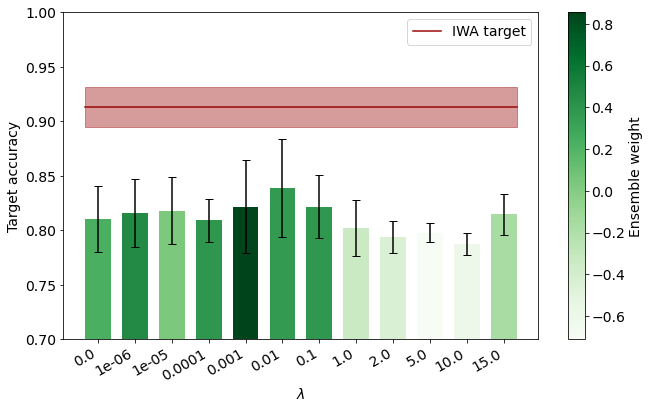

In [8]:
# Or create a different plot from the same data:
f = paperplot_lambdas_vs_accuracy_barplot(src_tgt_acc_df, ew_df, title='', cmap='Greens', ensemble_methods = ['agg'])

As a side note this is a plot of the data used for the experiments above:

In [21]:
def make_moon_plot(ax=None, figsize=(2 * 15 * 1 / 2.54, 2 * 8 * 1 / 2.54)):
    Xs_train_path = './data/MOONS/dataset/moons_source_train_x.npy'
    Ys_train_path = './data/MOONS/dataset/moons_source_train_y.npy'
    Xt_train_path = './data/MOONS/dataset/moons_target_train_x.npy'
    Yt_train_path = './data/MOONS/dataset/moons_target_train_y.npy'

    Xs_train = np.load(Xs_train_path)
    Ys_train = np.load(Ys_train_path)
    Xt_train = np.load(Xt_train_path)
    Yt_train = np.load(Yt_train_path)

    Xt = Xt_train
    Xs = Xs_train
    Ys = Ys_train

    Xs_0 = Xs[Ys.argmax(axis=1).astype(bool),:]
    Xs_1 = Xs[Ys.argmin(axis=1).astype(bool),:]

    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=figsize)
    else:
        f = None

    ax.scatter(Xt[:,0], Xt[:,1], c='black', alpha=0.3, s=20, label='target')
    ax.scatter(Xs_0[:,0], Xs_0[:,1], marker='+', c='orange', alpha=0.7, s=40, label='source class 0')
    ax.scatter(Xs_1[:,0], Xs_1[:,1], marker='x', c='blue', alpha=0.4, s=40, label='source class 1')
    # ax.grid()
    ax.legend()
    return f

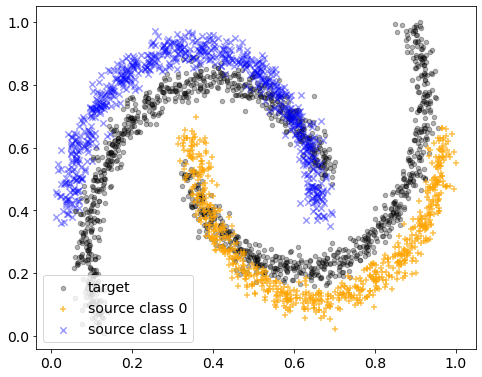

In [22]:
f = make_moon_plot(figsize=(2 * 10 * 1 / 2.54, 2 * 8 * 1 / 2.54))